In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.signal import butter, filtfilt

In [2]:
directory = r"G:\AIT\MLOps\ProjectAnalytics\aws\filtered"

def listFilePath(directory) -> list:
    paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            full_path = os.path.join(root, file)
            paths.append(full_path)
    return paths

raw_data = listFilePath(directory)
feature_files = []
for data in raw_data:
    filename = os.path.basename(data).lower()
    print(filename)

    if 'high' in filename:
        highPh_data = data
    elif 'chemical' in filename:
        chemical_data = data
    elif 'salt' in filename:
        salt_data = data
    elif 'organic' in filename:
        organic_data = data
    elif 'low' in filename:
        lowPh_data = data
    else:
        clean_data = data

chemical.csv
clean.csv
high_ph.csv
low_ph.csv
organic.csv
salt.csv


In [3]:
lowPh_df = pd.read_csv(highPh_data)
lowPh_df.head()

,ph_value,status,do_value,temp_value,salinity_value
0,9.4,True,9.62,27.8,136.0
1,9.5,True,9.61,27.8,165.9
2,6.7,True,9.62,27.9,169.4
3,7.2,True,9.62,27.9,174.5
4,13.4,True,9.62,27.8,136.0


In [4]:
highPh_df = pd.read_csv(lowPh_data)
highPh_df.head()

,ph_value,status,do_value,temp_value,salinity_value
0,12.4,True,9.61,29.0,420.4
1,12.4,True,9.60,28.9,426.2
2,12.4,True,9.60,29.0,426.2
3,12.6,True,9.60,28.9,422.3
4,12.7,True,9.61,29.0,420.4


In [5]:
lowPh_df['ph_value'] = lowPh_df['ph_value'] - 6
lowPh_df.head()

,ph_value,status,do_value,temp_value,salinity_value
0,3.4,True,9.62,27.8,136.0
1,3.5,True,9.61,27.8,165.9
2,0.7,True,9.62,27.9,169.4
3,1.2,True,9.62,27.9,174.5
4,7.4,True,9.62,27.8,136.0


In [6]:
chemical_df = pd.read_csv(chemical_data)
chemical_df.head()

,ph_value,do_value,temp_value,salinity_value
0,10.1,9.63,30.1,614.5
1,8.9,9.65,30.4,629.9
2,10.1,9.64,30.2,622.2
3,10.5,9.63,30.1,617.1
4,10.6,9.63,30.2,617.1


In [7]:
salt_df = pd.read_csv(salt_data)
salt_df.head()

,ph_value,do_value,temp_value,salinity_value
0,4.7,9.37,29.5,1345.3
1,6.3,9.38,29.4,1284.4
2,5.0,9.37,29.4,1329.8
3,4.8,9.37,29.5,1345.3
4,6.2,9.38,29.4,1274.5


In [8]:
organic_df = pd.read_csv(organic_data)
organic_df.head()

,ph_value,do_value,temp_value,salinity_value
0,9.0,9.64,29.6,434.0
1,9.1,9.66,29.6,373.3
2,9.3,9.66,29.5,349.8
3,9.0,9.66,29.6,348.0
4,9.1,9.67,29.5,316.3


In [9]:
clean_df = pd.read_csv(clean_data)
clean_df.head()

,ph_value,do_value,temp_value,salinity_value
0,6.9,9.66,28.9,227.5
1,6.7,9.66,28.9,232.6
2,7.2,9.66,28.9,225.8
3,9.9,9.65,28.9,224.1
4,9.2,9.65,28.9,230.9


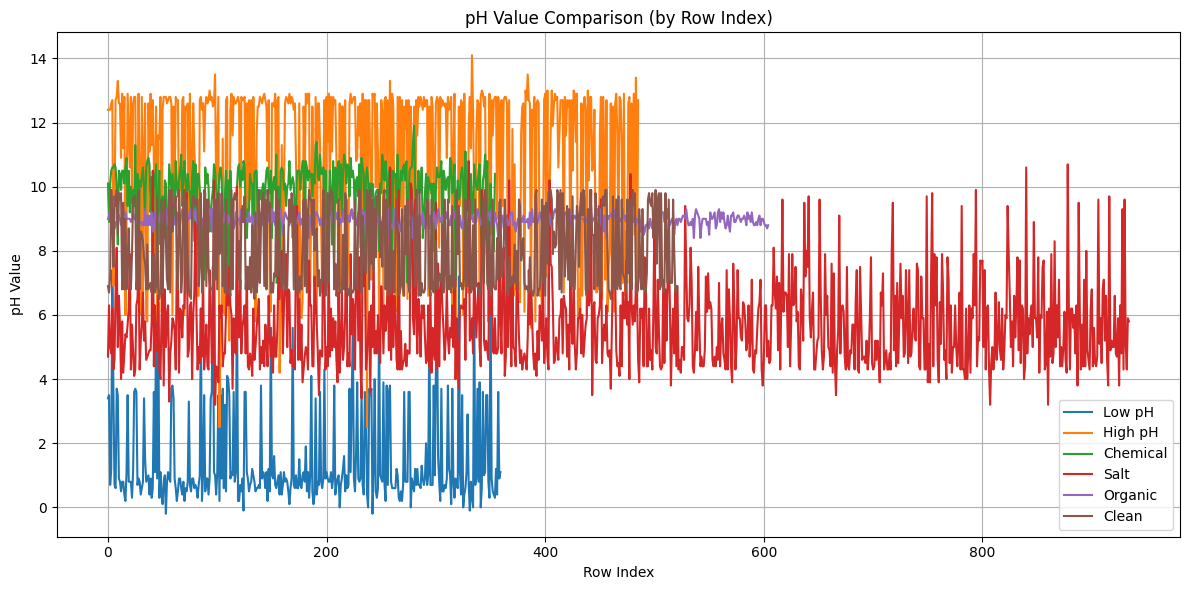

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(lowPh_df.index, lowPh_df['ph_value'], label='Low pH')
plt.plot(highPh_df.index, highPh_df['ph_value'], label='High pH')
plt.plot(chemical_df.index, chemical_df['ph_value'], label='Chemical')
plt.plot(salt_df.index, salt_df['ph_value'], label='Salt')
plt.plot(organic_df.index, organic_df['ph_value'], label='Organic')
plt.plot(clean_df.index, clean_df['ph_value'], label='Clean')

plt.title('pH Value Comparison (by Row Index)')
plt.xlabel('Row Index')
plt.ylabel('pH Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
print(f"lowPh_df.shape : {lowPh_df.shape}")
print(f"highPh_df.shape : {highPh_df.shape}")
print(f"chemical_df.shape : {chemical_df.shape}")
print(f"organic_df.shape : {organic_df.shape}")
print(f"clean_df.shape : {clean_df.shape}")

lowPh_df.shape : (360, 5)
highPh_df.shape : (486, 5)
chemical_df.shape : (355, 4)
organic_df.shape : (605, 4)
clean_df.shape : (521, 4)


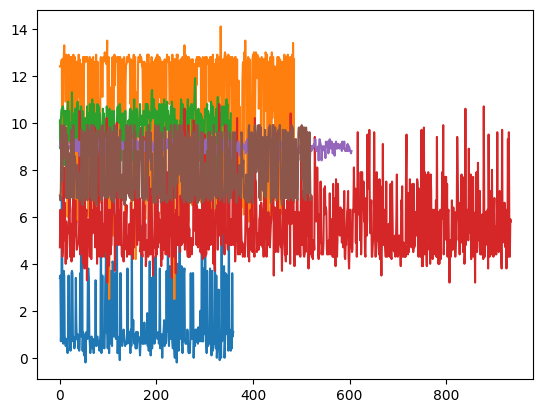

In [12]:
plt.plot(lowPh_df.ph_value, label='Low pH')
plt.plot(highPh_df.ph_value, label='high pH')
plt.plot(chemical_df.ph_value, label='Chemical')
plt.plot(salt_df.ph_value, label='salt')
plt.plot(organic_df.ph_value, label='organic')
plt.plot(clean_df.ph_value, label='clean')

In [13]:
def drop_random_rows(df: pd.DataFrame, n: int = 100) -> pd.DataFrame:
    if n >= len(df):
        raise ValueError("Cannot drop more rows than the DataFrame has.")
    return df.drop(df.sample(n=n, random_state=42).index)

In [14]:
def find_xVal(row_count: int, target: int = 355) -> int:
    return row_count - target

In [15]:
target_rows = 355

lowPh_df = drop_random_rows(lowPh_df, find_xVal(lowPh_df.shape[0], target_rows))
highPh_df = drop_random_rows(highPh_df, find_xVal(highPh_df.shape[0], target_rows))
chemical_df = drop_random_rows(chemical_df, find_xVal(chemical_df.shape[0], target_rows))
salt_df = drop_random_rows(salt_df, find_xVal(salt_df.shape[0], target_rows))
organic_df = drop_random_rows(organic_df, find_xVal(organic_df.shape[0], target_rows))
clean_df = drop_random_rows(clean_df, find_xVal(clean_df.shape[0], target_rows))

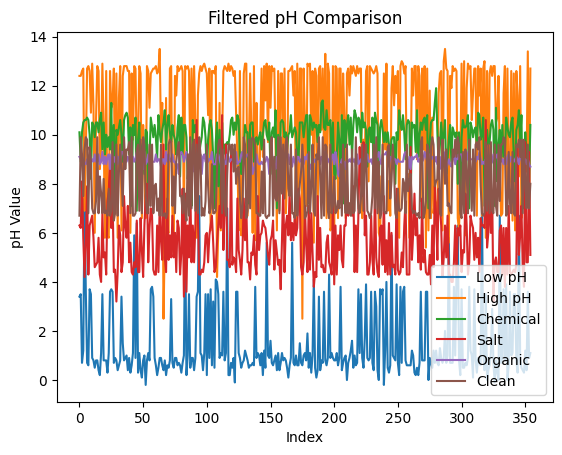

In [16]:
plt.plot(lowPh_df.ph_value.values, label='Low pH')
plt.plot(highPh_df.ph_value.values, label='High pH')
plt.plot(chemical_df.ph_value.values, label='Chemical')
plt.plot(salt_df.ph_value.values, label='Salt')
plt.plot(organic_df.ph_value.values, label='Organic')
plt.plot(clean_df.ph_value.values, label='Clean')

plt.legend()
plt.title("Filtered pH Comparison")
plt.xlabel("Index")
plt.ylabel("pH Value")
plt.show()

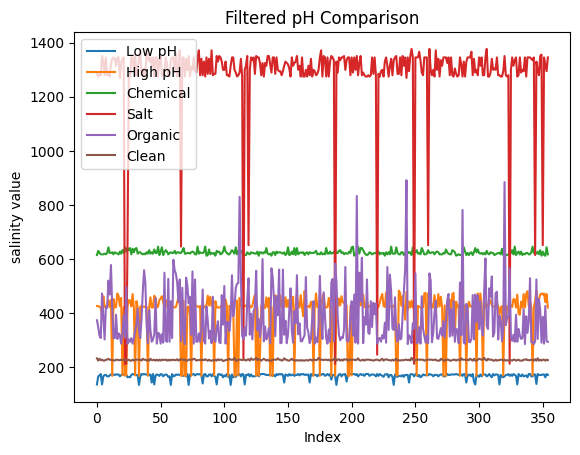

In [17]:
plt.plot(lowPh_df.salinity_value.values, label='Low pH')
plt.plot(highPh_df.salinity_value.values, label='High pH')
plt.plot(chemical_df.salinity_value.values, label='Chemical')
plt.plot(salt_df.salinity_value.values, label='Salt')
plt.plot(organic_df.salinity_value.values, label='Organic')
plt.plot(clean_df.salinity_value.values, label='Clean')

plt.legend()
plt.title("Filtered pH Comparison")
plt.xlabel("Index")
plt.ylabel("salinity value")
plt.show()

In [18]:
# def apply_lowpass_filter(df: pd.DataFrame, column: str, cutoff: float = 0.1, order: int = 2, new_column: str = None) -> pd.DataFrame:
#     data = df[column].values
#     b, a = butter(order, cutoff, btype='low', analog=False)
#     filtered_data = filtfilt(b, a, data)

#     filtered_column_name = new_column if new_column else f"{column}_filtered"
#     df[filtered_column_name] = filtered_data
#     return df

In [19]:
def apply_lowpass_filter_multi(df: pd.DataFrame, columns: list[str], cutoff: float = 0.1, order: int = 2) -> pd.DataFrame:
    from scipy.signal import butter, filtfilt

    for col in columns:
        if col in df.columns:
            data = df[col].values
            b, a = butter(order, cutoff, btype='low', analog=False)
            filtered_data = filtfilt(b, a, data)
            df[f'{col}_filtered'] = filtered_data
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    return df

In [20]:
columns_to_filter = ['ph_value', 'do_value', 'temp_value', 'salinity_value']

lowPh_df_filtered = apply_lowpass_filter_multi(lowPh_df, columns_to_filter)
highPh_df_filtered = apply_lowpass_filter_multi(highPh_df, columns_to_filter)
chemical_df_filtered = apply_lowpass_filter_multi(chemical_df, columns_to_filter)
salt_df_filtered = apply_lowpass_filter_multi(salt_df, columns_to_filter)
organic_df_filtered = apply_lowpass_filter_multi(organic_df, columns_to_filter)
clean_df_filtered = apply_lowpass_filter_multi(clean_df, columns_to_filter)

In [21]:
# def save_only_filtered_columns(df: pd.DataFrame, name: str, output_dir: str = "./filtered_outputs"):

#     import os
#     os.makedirs(output_dir, exist_ok=True)

#     # Select only columns ending in "_filtered"
#     filtered_df = df[[col for col in df.columns if col.endswith('_filtered')]]

#     # Build file path and save
#     filename = f"filtered_{name}.csv"
#     file_path = os.path.join(output_dir, filename)
#     filtered_df.to_csv(file_path, index=False, float_format="%.3f")
#     print(f"Saved: {file_path}")

In [22]:
# save_only_filtered_columns(lowPh_df, "lowPh")
# save_only_filtered_columns(highPh_df, "highPh")
# save_only_filtered_columns(chemical_df, "chemical")
# save_only_filtered_columns(salt_df, "salt")
# save_only_filtered_columns(organic_df, "organic")
# save_only_filtered_columns(clean_df, "clean")

In [23]:
def plot_only_filtered_columns(df: pd.DataFrame, title_prefix: str = ""):
    filtered_columns = [col for col in df.columns if col.endswith('_filtered')]

    for col in filtered_columns:
        plt.figure(figsize=(10, 4))
        plt.plot(df[col].values, label=col.replace('_filtered', '').capitalize(), linewidth=2)
        plt.title(f"{title_prefix} - {col.replace('_filtered', '').capitalize()} (Filtered)")
        plt.xlabel("Sample Index")
        plt.ylabel(col.replace("_value_filtered", "").capitalize())
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [24]:
def plot_filtered_param_across_datasets(dfs: dict, column: str):
    plt.figure(figsize=(12, 6))
    for label, df in dfs.items():
        filtered_col = f"{column}_filtered"
        if filtered_col in df.columns:
            plt.plot(df[filtered_col].values, label=label)
        else:
            print(f"Warning: {filtered_col} not found in {label}")
    plt.title(f"Filtered {column.replace('_value', '').capitalize()} Across Water Types")
    plt.xlabel("Sample Index")
    plt.ylabel(column.replace('_value', '').capitalize())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


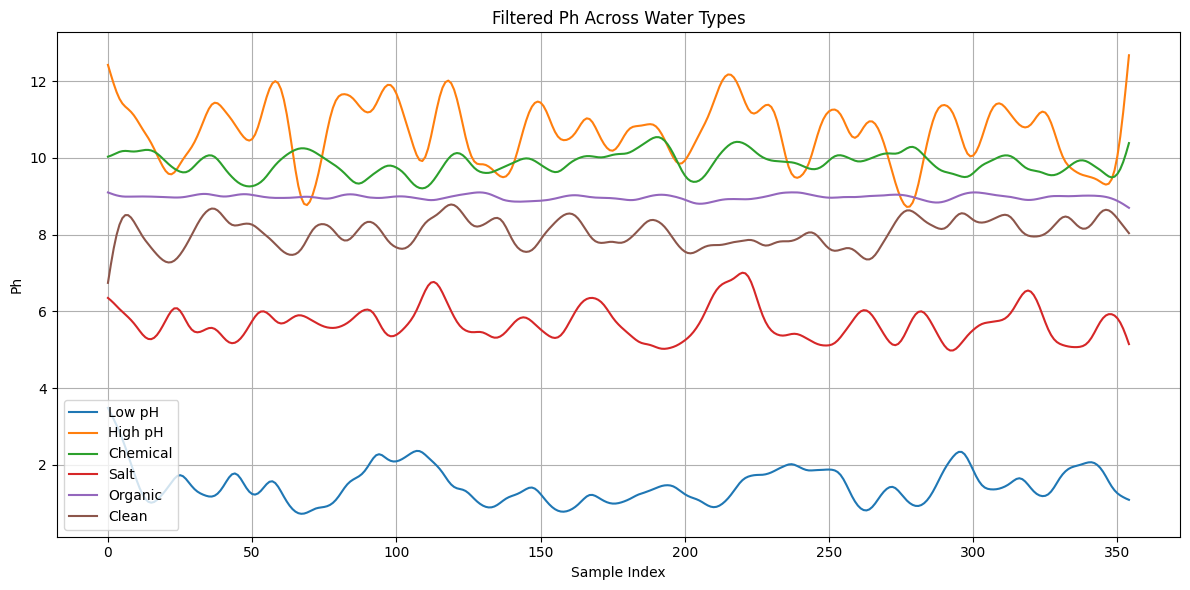

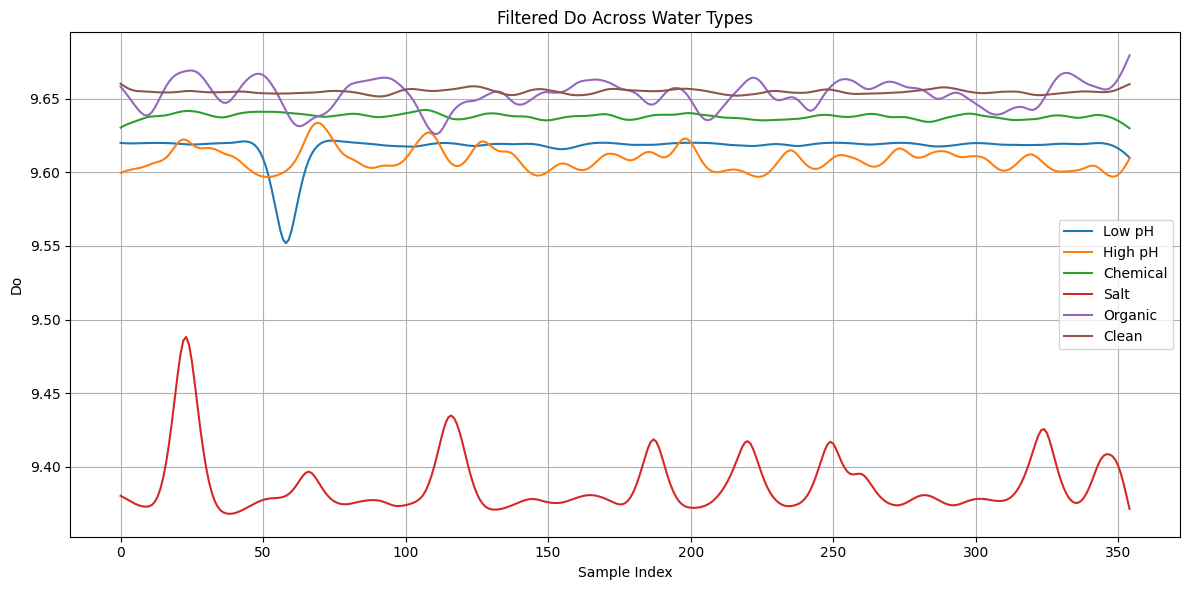

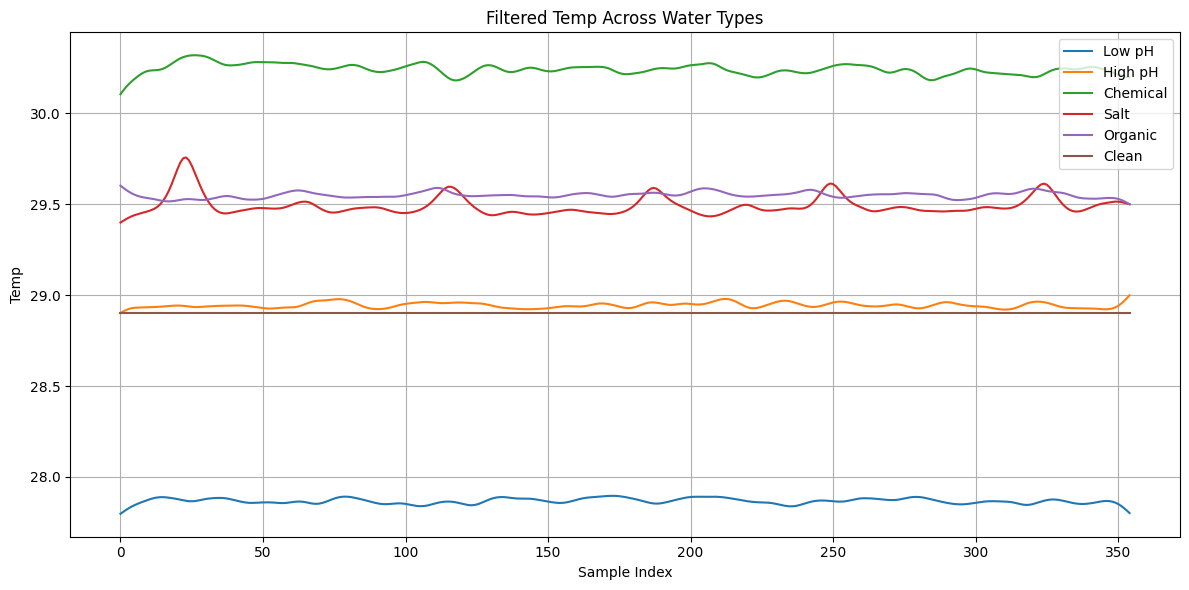

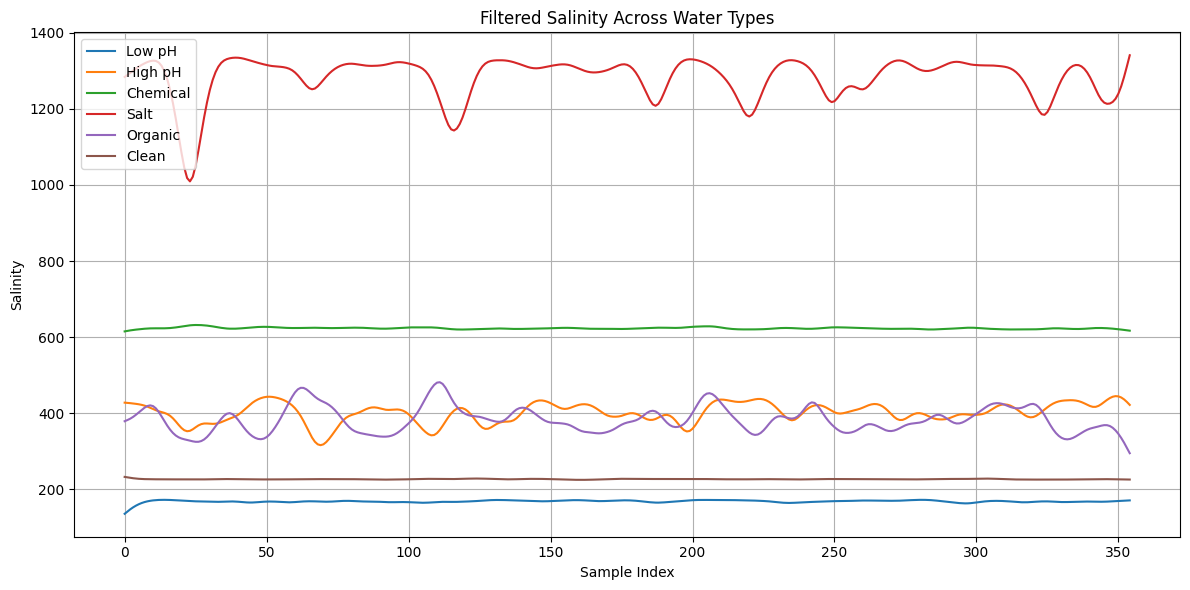

In [25]:
columns_to_filter = ['ph_value', 'do_value', 'temp_value', 'salinity_value']

dfs = {
    'Low pH': lowPh_df_filtered,
    'High pH': highPh_df_filtered,
    'Chemical': chemical_df_filtered,
    'Salt': salt_df_filtered,
    'Organic': organic_df_filtered,
    'Clean': clean_df_filtered
}

# Plot each parameter
for col in columns_to_filter:
    plot_filtered_param_across_datasets(dfs, col)

In [26]:
lowPh_df_filtered["label"] = 1
highPh_df_filtered["label"] = 2
chemical_df_filtered["label"] = 3
salt_df_filtered["label"] = 4
organic_df_filtered["label"] = 5
clean_df_filtered["label"] = 0

combined_df = pd.concat([
    clean_df_filtered,
    lowPh_df_filtered,
    highPh_df_filtered,
    chemical_df_filtered,
    salt_df_filtered,
    organic_df_filtered
], ignore_index=True)

combined_df.to_csv("filtered_labeled_dataset.csv", index=False, float_format="%.3f")


In [27]:
lowPh_df_filtered.head()

,ph_value,status,do_value,temp_value,salinity_value,ph_value_filtered,do_value_filtered,temp_value_filtered,salinity_value_filtered,label
0,3.4,True,9.62,27.8,136.0,3.484911,9.619999,27.797035,135.805285,1
1,3.5,True,9.61,27.8,165.9,3.338293,9.619854,27.808091,141.949641,1
2,0.7,True,9.62,27.9,169.4,3.186005,9.619752,27.818834,147.720712,1
3,1.2,True,9.62,27.9,174.5,3.030179,9.619704,27.828643,152.859606,1
4,7.4,True,9.62,27.8,136.0,2.862158,9.619699,27.837342,157.290766,1
